## <b>Outliers/Davients/Abnormalities/Anamolious point/Abbrant Observations
Outlier is a data point that is `significantly different` from `other data points` in a dataset. It's like the `odd one` out that `doesn't quite fit` with the rest.
- Effects ML model
- Sqewness in the data
- Effects the results in data
- Decision and reporting

## <b>Types of Outliers

- `Univariate Outliers (Outliers in a Single Variable):`
Imagine you have one type of data, like the height of students in a class. Univariate outliers are extreme values in this single set of data. For example, if most students are around 160-180 cm tall, but one student is 220 cm tall, that student might be considered a univariate outlier.
- `Multivariate Outliers:`
Now, think about having multiple types of data about each student, like height, weight, and age. Multivariate outliers are not just extreme values in one variable but are extreme combinations of values across multiple variables. For example, if a student is very tall, very heavy, and very young compared to others, they might be a multivariate outlier.
- `Global Outliers:`
Global outliers are extreme values that are unusual across the entire dataset. They stand out compared to all the other data points, regardless of their location in the dataset.
- `Point Outliers:`
Point outliers are individual data points that are very different from the rest of the data, no matter if they are extreme globally or locally. They are like unique points that don't follow the general pattern of the data.
- `Local Outliers:`
Local outliers are extreme values that are unusual only within a specific subset or neighborhood of the data. They might not be globally extreme but stand out within a smaller group of data points.
- `Contextual Outliers:`
Contextual outliers are extreme values that are considered outliers only within a specific context or condition. For example, in a study about urban areas, a very high crime rate in a rural area might be considered a contextual outlier, even though it's not extreme globally.

## <b>Causes of Outliers:

- `Measurement Errors:` Sometimes, mistakes happen during data collection. For example, a typo in recording someone's weight might make it seem much higher or lower than it actually is.
- `Natural Variation:` In real-world data, there can be natural variations or extremes that are rare but still valid. For instance, most people might earn around $50,000 per year, but some exceptionally wealthy individuals might earn millions.
- `Data Processing Errors:` Errors can occur during data processing or entry, leading to outliers. For example, a glitch in a sensor might produce an unusually high temperature reading.
Sampling Errors: When data is collected from a sample rather than an entire population, outliers can occur due to chance. For instance, a survey might accidentally include a respondent with an unusually high income.
- `Genuine Anomalies:` Sometimes, outliers represent genuine anomalies or special cases in the data. For example, in medical research, a patient with an extremely rare condition might be considered an outlier.

## <b>Outliers Detection
- `Visual Inspection:`
One of the easiest ways to detect outliers is by visualizing the data using plots such as scatter plots, box plots, or histograms.
Outliers may appear as points that are far away from the main cluster of data points or as data points that fall outside the typical range of values.
- `Summary Statistics:`
Calculate summary statistics such as mean, median, standard deviation, minimum, and maximum values for the dataset.
Data points that lie far from the mean or median, or fall outside a certain range defined by standard deviation or percentiles (e.g., quartiles), may be considered outliers.
- `Z-Score:`
Calculate the z-score for each data point, which measures how many standard deviations away a data point is from the mean.
Data points with a z-score greater than a threshold (e.g., 3 or -3) may be considered outliers.

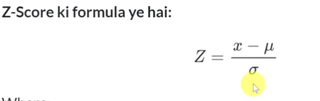


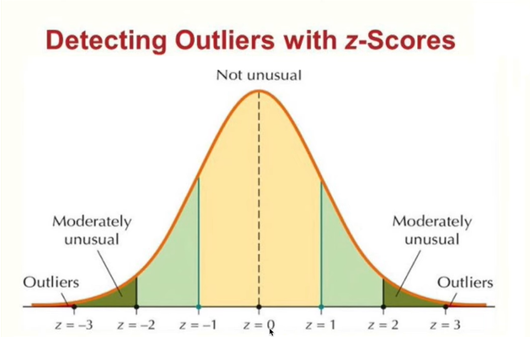
- `Interquartile Range (IQR):`
Calculate the interquartile range (IQR), which is the difference between the third quartile (Q3) and the first quartile (Q1).
Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR may be considered outliers.
- `Machine Learning Models:`
Use machine learning algorithms such as isolation forest, one-class SVM, or DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to identify outliers.
These algorithms learn the normal patterns in the data and flag data points that deviate significantly from the learned patterns as outliers.
- `Domain Knowledge:`
Consider the domain or context of the data when identifying outliers.
Some data points may be valid but rare occurrences in the dataset and should not be treated as outliers.

In [1]:
# importing librariies
import pandas as pd
import numpy as np

# Create a data frame
data = pd.DataFrame({"age":[20,22,24,33,23,32,27,31,31,25,30,60]})
data.head()

,age
0,20
1,22
2,24
3,33
4,23


1.	STEP 1: Calculate Mean and Standard Deviation:
- The `np.mean()` function calculates the mean (average) of the `'age'` column in the dataset.
- The `np.std()` function calculates the standard deviation of the `'age'` column in the dataset.
- `Mean` represents the `average value` of the 'age' column, and the `standard deviation` measures the `spread or dispersion` of the values around the mean.
2.	STEP 2: Calculate Z-Score:
- The Z-Score is calculated for each data point in the 'age' column using the formula: 
```
        Z-Score=(Data Point−Mean)/Standard Deviation                                  
```

In [2]:
# STEP 1: Calculate Mean and Standard Deviation
# Calculate the mean of the 'age' column in the data
mean = np.mean(data['age'])
# Calculate the standard deviation of the 'age' column in the data
std = np.std(data['age'])

# STEP 2: Calculate Z-Score
# Calculate the Z-Score for each data point in the 'age' column
# Z-Score measures how many standard deviations a data point is from the mean
# It's calculated by subtracting the mean from each data point and dividing by the standard deviation
data['Z-Score'] = (data['age'] - mean) / std
data.head(12)

,age,Z-Score
0,20,-0.984291
1,22,-0.784096
2,24,-0.583901
3,33,0.316975
4,23,-0.683999
5,32,0.216878
6,27,-0.283609
7,31,0.116780
8,31,0.116780
9,25,-0.483804


In [3]:
# STEP 3: Print the data
print("-----------------------------------------------------------------")
print(f"Here is the data with outliers.\n {data}")
print("-----------------------------------------------------------------")


-----------------------------------------------------------------
Here is the data with outliers.
     age   Z-Score
0    20 -0.984291
1    22 -0.784096
2    24 -0.583901
3    33  0.316975
4    23 -0.683999
5    32  0.216878
6    27 -0.283609
7    31  0.116780
8    31  0.116780
9    25 -0.483804
10   30  0.016683
11   60  3.019604
-----------------------------------------------------------------


In [4]:
# STEP 4: Print the outliers
print(f"Here are the outliers based on the Z-Score ThrashHold, 3\n {data[data['Z-Score']>3]}")
print("-------------------------------------------------------------------")


Here are the outliers based on the Z-Score ThrashHold, 3
     age   Z-Score
11   60  3.019604
-------------------------------------------------------------------


In [5]:

# Step 5: Remove the outliers
data = data[data['Z-Score']<=3]
data


,age,Z-Score
0,20,-0.984291
1,22,-0.784096
2,24,-0.583901
3,33,0.316975
4,23,-0.683999
5,32,0.216878
6,27,-0.283609
7,31,0.116780
8,31,0.116780
9,25,-0.483804


In [6]:

# Step 6: Print the data without Outliers
print(f"Here is the data without outliers \n {data}")

Here is the data without outliers 
     age   Z-Score
0    20 -0.984291
1    22 -0.784096
2    24 -0.583901
3    33  0.316975
4    23 -0.683999
5    32  0.216878
6    27 -0.283609
7    31  0.116780
8    31  0.116780
9    25 -0.483804
10   30  0.016683


## <b>With Scipy Library

In [9]:
# Import necessary libraries
import numpy as np  # NumPy is used for numerical operations
from scipy import stats  # The stats module from SciPy is used for statistical functions

# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]  # A list of data points, including an outlier (110.0)

# Calculate the Z-score for each data point
# The Z-score measures how many standard deviations a data point is from the mean
# 'stats.zscore(data)' computes the Z-scores for the data
# 'np.abs()' takes the absolute value of each Z-score
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5  # Define a threshold value; data points with a Z-score greater than this value will be considered outliers

# Identify the indices of the outliers
# 'np.where(z_scores > threshold)[0]' returns the indices of the data points where the Z-score is greater than the threshold
outliers = np.where(z_scores > threshold)[0]

# Print the original data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

# Print the indices and values of the outliers
print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers from the data
# Create a new list that includes only the data points whose indices are not in the 'outliers' list
data = [data[i] for i in range(len(data)) if i not in outliers]

# Print the data without outliers
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


## <b>Using IQR Library

In [10]:
# Step 1: Import the required libraries
import pandas as pd  # Pandas is used for data manipulation and analysis
import numpy as np  # NumPy is used for numerical operations

# Step 2: Create the data
# Create a DataFrame with a single column 'Age' containing the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]})

# Step 3: Calculate the first and third quartile
# Calculate the first quartile (Q1), which is the 25th percentile of the data
# 'interpolation = 'midpoint'' is used to specify how the midpoint should be interpolated if the percentile lies between two data points
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')

# Calculate the third quartile (Q3), which is the 75th percentile of the data
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

# Step 4: Calculate the IQR
# The Interquartile Range (IQR) is the difference between the third and first quartiles
IQR = Q3 - Q1

# Step 5: Calculate the lower and upper bound
# The lower bound is Q1 minus 1.5 times the IQR
lower_bound = Q1 - (1.5 * IQR)

# The upper bound is Q3 plus 1.5 times the IQR
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
# Print a separator line
print("----------------------------------------")

# Print the original data with outliers
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")

# Step 7: Print the outliers
# Identify and print the outliers based on the IQR threshold
# Outliers are data points that are less than the lower bound or greater than the upper bound
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")
print("----------------------------------------")

# Step 8: Remove the outliers
# Remove the outliers from the data
# Keep only the data points that are greater than or equal to the lower bound and less than or equal to the upper bound
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the data without outliers
# Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
11   50
----------------------------------------
Here is the data without outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


## <b>Outliers using K-means

In [11]:
# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans

# Sample data
# A list of data points, where points like [30, 30], [31, 31], and [32, 32] are potential outliers
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Create a K-means model with two clusters
# n_clusters=2 specifies that the data should be divided into 2 clusters
# n_init=10 specifies that the algorithm should run 10 times with different initial centroids to find the best clustering
kmeans = KMeans(n_clusters=2, n_init=10)

# Fit the K-means model to the data
kmeans.fit(data)

# Predict the cluster labels for the data points
# This assigns each data point to one of the 2 clusters
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
# Outliers are identified as the data points that belong to the cluster labeled '1'
# This assumes that the normal data points are in the cluster labeled '0' and outliers are in the cluster labeled '1'
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# Print the original data
print("Data:", data)

# Print the identified outliers
print("Outliers:", outliers)

# Remove outliers from the data
# Keep only the data points that belong to the cluster labeled '0'
data = [data[i] for i, label in enumerate(labels) if label == 0]

# Print the data without outliers
print("Data without outliers:", data)

Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[2, 2], [3, 3], [3, 4]]
Data without outliers: [[30, 30], [31, 31], [32, 32]]
